In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import xgboost as xgb

from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('RTA_preprocessed.csv')
df

,Day_of_week,Sex_of_driver,Number_of_vehicles_involved,Number_of_casualties,Sex_of_casualty,Casualty_severity,Accident_severity,TimeHr,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,0,1,2,2,1,3,Slight Injury,17,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,2,2,1,3,Slight Injury,17,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,2,2,1,3,Serious Injury,17,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,1,2,2,0,3,Slight Injury,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,1,2,2,1,3,Slight Injury,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,2,1,2,1,1,3,Slight Injury,16,1,0,...,1,0,0,0,0,0,0,0,0,0
12312,6,1,2,1,1,3,Slight Injury,18,0,0,...,1,0,0,0,0,0,0,0,0,0
12313,6,1,1,1,1,3,Serious Injury,13,0,1,...,0,0,0,0,0,0,0,0,0,0
12314,6,0,2,1,1,3,Slight Injury,13,0,0,...,0,0,0,0,0,0,0,0,0,0


# Handling the target variable

In [3]:
le = LabelEncoder()
df['Accident_severity'] = le.fit_transform(df['Accident_severity'])
df.head()

,Day_of_week,Sex_of_driver,Number_of_vehicles_involved,Number_of_casualties,Sex_of_casualty,Casualty_severity,Accident_severity,TimeHr,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,0,1,2,2,1,3,2,17,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,2,2,1,3,2,17,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,2,2,1,3,1,17,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,1,2,2,0,3,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,1,2,2,1,3,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [4]:
le.classes_

array(['Fatal injury', 'Serious Injury', 'Slight Injury'], dtype=object)

In [5]:
df['Accident_severity'].value_counts()

2    10415
1     1743
0      158
Name: Accident_severity, dtype: int64

In [6]:
X = df.drop('Accident_severity', axis = 1)
Y = df['Accident_severity']
X.shape, len(Y)

((12316, 141), 12316)

# Upsampling to negate class imbalance

In [7]:
sm = SMOTE(random_state = 10)
Xs, Ys = sm.fit_resample(X, Y)
Xs.shape, Ys.shape

((31245, 141), (31245,))

In [9]:
Ys.value_counts()

2    10415
1    10415
0    10415
Name: Accident_severity, dtype: int64

In [11]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xs, Ys, test_size = 0.25, random_state = 10)
Xtrain.shape, Xtest.shape

((23433, 141), (7812, 141))

# Model building by traditional ML models

In [16]:
#Logistic Regression
lR = LogisticRegression(penalty = 'l2', max_iter = 1000000)
grid1 = {'solver':['newton-cg', 'lbfgs', 'sag']}

bestLR = GridSearchCV(lR, grid1, cv = 5)
bestLR.fit(Xtrain, Ytrain)
bestLR.best_estimator_

LogisticRegression(max_iter=1000000, solver='newton-cg')

In [17]:
bestLR.score(Xtest, Ytest)      #by using Logistic Regression we get test accuracy of 80.2%

0.8017153097798259

In [18]:
#Random Forest Classifier
rf = RandomForestClassifier(criterion = 'gini')
grid2 = {'n_estimators':[10, 20, 50, 100],
        'max_depth':[5, 6, 7]}

bestRF = GridSearchCV(rf, grid2, cv = 5)
bestRF.fit(Xtrain, Ytrain)
bestRF.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=50)

In [19]:
bestRF.score(Xtest, Ytest)              #by using Random Forests we get accuracy of 76.8%

0.768305171530978

In [12]:
#XGBoost Classifier
xgbc = xgb.XGBClassifier()
xgbc.fit(Xtrain, Ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [13]:
xgbc.score(Xtest, Ytest)                        #by using XGBoost we get accuracy of 91.97%

0.9197388632872504

# Predicting data

In [17]:
#we will use XGBoost as it gives max accuracy
Ypred = xgbc.predict(Xtest)

In [19]:
print(classification_report(Ytest, Ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2602
           1       0.92      0.84      0.88      2582
           2       0.86      0.93      0.89      2628

    accuracy                           0.92      7812
   macro avg       0.92      0.92      0.92      7812
weighted avg       0.92      0.92      0.92      7812



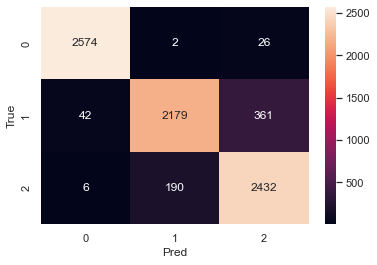

In [18]:
cm = confusion_matrix(Ytest, Ypred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()